<h1>Изменение данных датасета</h1>

In [606]:
import pandas as pd
import numpy as np

# Загрузите данные из файла CSV
file_path = 'healthcare_dataset.csv'
df = pd.read_csv(file_path)

# Создайте возраста близкие к 60 с использованием нормального распределения
total_people = len(df)
peak_age = 60
std_dev = 16  # Регулируйте стандартное отклонение для формирования разнообразия возрастов
ages = np.clip(np.random.normal(peak_age, std_dev, total_people).astype(int), 20, 90)

# Создайте функцию для уменьшения количества людей с возрастом
def reduce_older_people(age):
    # Например, уменьшим количество людей старше 70 лет
    if age > 70:
        return age - np.random.randint(1, 6)
    return age

# Примените функцию к столбцу 'Age'
df['Age'] = np.vectorize(reduce_older_people)(ages)

# Сохраните измененные данные обратно в файл CSV
df.to_csv(file_path, index=False)

In [607]:
import pandas as pd

# Загрузка данных
data_path = 'healthcare_dataset.csv'
df = pd.read_csv(data_path)

In [608]:
import pandas as pd
import numpy as np

# Load data from CSV
file_path = 'healthcare_dataset.csv'
df = pd.read_csv(file_path)

# Define normalized probabilities for each blood type
blood_type_percentages = {
    'O+': 0.38,
    'A+': 0.28,
    'B+': 0.21,
    'AB+': 0.06,
    'O-': 0.015,
    'A-': 0.025,
    'B-': 0.015,
    'AB-': 0.005
}

# Normalize probabilities to ensure they sum to 1.0
total_probability = sum(blood_type_percentages.values())
normalized_probabilities = {key: value / total_probability for key, value in blood_type_percentages.items()}

# Create a new "Blood Type" column with the specified probabilities
total_people = len(df)
blood_types = np.random.choice(list(normalized_probabilities.keys()), total_people, p=list(normalized_probabilities.values()))
df['Blood Type'] = blood_types

# Save the modified data back to the CSV file
df.to_csv(file_path, index=False)


In [609]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Add a new "Medical Condition" column with random conditions based on specified probabilities
conditions = ['Pneumonia', 'Hypertension', 'Diabetes', 'Arthritis', 'Gastritis', 'Anemia']
probabilities = [0.17, 0.17, 0.17, 0.17, 0.17, 0.15]

df['Medical Condition'] = np.random.choice(conditions, len(df), p=probabilities)


In [610]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Add a new "isDrinking" column based on gender-specific probabilities
df['isDrinking'] = np.where((df['Gender'] == 'Male') & (np.random.rand(len(df)) < 0.71), 1, 0)
df['isDrinking'] = np.where((df['Gender'] == 'Female') & (np.random.rand(len(df)) < 0.37), 1, df['isDrinking'])


In [611]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Add a new "isSmoking" column based on gender-specific probabilities
df['isSmoking'] = np.where((df['Gender'] == 'Male') & (np.random.rand(len(df)) < 0.65), 1, 0)
df['isSmoking'] = np.where((df['Gender'] == 'Female') & (np.random.rand(len(df)) < 0.45), 1, df['isSmoking'])


In [612]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Add a new "isImproperDiet" column based on gender-specific probabilities
df['isImproperDiet'] = np.where((df['Gender'] == 'Male') & (np.random.rand(len(df)) < 0.69), 1, 0)
df['isImproperDiet'] = np.where((df['Gender'] == 'Female') & (np.random.rand(len(df)) < 0.38), 1, df['isImproperDiet'])


In [613]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Add a new "Medical Condition" column based on smoking status
df['Medical Condition'] = np.where((df['isSmoking'] == 1) & (np.random.rand(len(df)) < 0.9), 'Pneumonia', df['Medical Condition'])
df['Medical Condition'] = np.where((df['isSmoking'] == 1) & (np.random.rand(len(df)) < 0.1), 'Hypertension', df['Medical Condition'])

In [614]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Add a new "Medical Condition" column based on drinking status
df['Medical Condition'] = np.where((df['isDrinking'] == 1) & (np.random.rand(len(df)) < 0.9), 'Anemia', df['Medical Condition'])
df['Medical Condition'] = np.where((df['isDrinking'] == 1) & (np.random.rand(len(df)) < 0.1), 'Gastritis', df['Medical Condition'])


In [615]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Add a new "Medical Condition" column based on improper diet status
df['Medical Condition'] = np.where((df['isImproperDiet'] == 1) & (np.random.rand(len(df)) < 0.9), 'Arthritis', df['Medical Condition'])
df['Medical Condition'] = np.where((df['isImproperDiet'] == 1) & (np.random.rand(len(df)) < 0.1), 'Diabetes', df['Medical Condition'])


In [616]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Generate synthetic data for illustration
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Calculate the timedelta
df['Days hospitalized'] = (df['Discharge Date'] - df['Date of Admission']).dt.total_seconds() / (24 * 60 * 60)

# Convert to int64
df['Days hospitalized'] = df['Days hospitalized'].astype('int64')

# Create a relationship between "Days hospitalized" and "Billing Amount"
# Adjust the parameters as needed to control the relationship
df['Billing Amount'] = df['Days hospitalized'] * np.random.uniform(10, 20, size=len(df))

# Display the updated DataFrame
print(df[['Days hospitalized', 'Billing Amount']].head())

df.head()

   Days hospitalized  Billing Amount
0                 23      277.256020
1                 16      253.532751
2                 20      378.709720
3                 29      575.248098
4                  1       12.653082


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,isDrinking,isSmoking,isImproperDiet,Days hospitalized
0,Jesse Brown,24,Female,O+,Anemia,2021-08-04,Janet Wilson,"Morales, Johnson and Campbell",Cigna,277.256020,467,Elective,2021-08-27,Lipitor,Normal,1,0,0,23
1,Jake Jensen,77,Female,A+,Arthritis,2021-09-08,John Newman,"Hendrix, Jackson and Powers",UnitedHealthcare,253.532751,321,Elective,2021-09-24,Paracetamol,Abnormal,1,1,1,16
2,Diana Thornton,88,Male,A+,Arthritis,2020-10-26,Drew Patel,Wilson PLC,UnitedHealthcare,378.709720,396,Emergency,2020-11-15,Aspirin,Abnormal,0,1,1,20
3,Mark Moss,86,Male,A+,Anemia,2019-11-04,Jacob Hunt,Smith-Wilkins,UnitedHealthcare,575.248098,344,Emergency,2019-12-03,Ibuprofen,Abnormal,1,1,1,29
4,Kim Mills,50,Male,A+,Diabetes,2019-06-30,Timothy Clark,Edwards Inc,Blue Cross,12.653082,158,Emergency,2019-07-01,Aspirin,Normal,0,0,0,1


<h1>About Dataset</h1>
<b>Dataset Information:</b>

Each column provides specific information about the patient, their admission, and the healthcare services provided, making this dataset suitable for various data analysis and modeling tasks in the healthcare domain. Here's a brief explanation of each column in the dataset -

<b>Name:</b> This column represents the name of the patient associated with the healthcare record.

<b>Age:</b> The age of the patient at the time of admission, expressed in years.

<b>Gender:</b> Indicates the gender of the patient, either "Male" or "Female."

<b>Blood Type:</b> The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).

<b>Medical Condition:</b> This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.

<b>Date of Admission:</b> The date on which the patient was admitted to the healthcare facility.

<b>Doctor:</b> The name of the doctor responsible for the patient's care during their admission.

<b>Hospital:</b> Identifies the healthcare facility or hospital where the patient was admitted.

<b>Insurance Provider:</b> This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."

<b>Billing Amount:</b> The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.

<b>Room Number:</b> The room number where the patient was accommodated during their admission.

<b>Admission Type:</b> Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.

<b>Discharge Date:</b> The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.

<b>Medication:</b> Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."

<b>Test Results:</b> Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

<h1>Importing Libraries</h1>


In [617]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
import sklearn
import plotly.express as ex

import warnings
warnings.filterwarnings('ignore')

In [618]:
df.head().T

,0,1,2,3,4
Name,Jesse Brown,Jake Jensen,Diana Thornton,Mark Moss,Kim Mills
Age,24,77,88,86,50
Gender,Female,Female,Male,Male,Male
Blood Type,O+,A+,A+,A+,A+
Medical Condition,Anemia,Arthritis,Arthritis,Anemia,Diabetes
Date of Admission,2021-08-04 00:00:00,2021-09-08 00:00:00,2020-10-26 00:00:00,2019-11-04 00:00:00,2019-06-30 00:00:00
Doctor,Janet Wilson,John Newman,Drew Patel,Jacob Hunt,Timothy Clark
Hospital,"Morales, Johnson and Campbell","Hendrix, Jackson and Powers",Wilson PLC,Smith-Wilkins,Edwards Inc
Insurance Provider,Cigna,UnitedHealthcare,UnitedHealthcare,UnitedHealthcare,Blue Cross
Billing Amount,277.25602,253.532751,378.70972,575.248098,12.653082


<h1>Inspecting Dataframe Structure</h1>

In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

In [620]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
isDrinking            0
isSmoking             0
isImproperDiet        0
Days hospitalized     0
dtype: int64

In [621]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date,isDrinking,isSmoking,isImproperDiet,Days hospitalized
count,10000.000000,10000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000
mean,58.756200,2021-05-01 21:53:25.440000,233.590089,300.082000,2021-05-17 11:22:24.960000,0.545200,0.548300,0.542300,15.561800
min,20.000000,2018-10-30 00:00:00,10.031810,101.000000,2018-11-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,49.000000,2020-02-10 00:00:00,117.132189,199.000000,2020-02-23 18:00:00,0.000000,0.000000,0.000000,8.000000
50%,60.000000,2021-05-02 00:00:00,224.818370,299.000000,2021-05-18 00:00:00,1.000000,1.000000,1.000000,16.000000
75%,69.000000,2022-07-23 06:00:00,334.341070,400.000000,2022-08-07 00:00:00,1.000000,1.000000,1.000000,23.000000
max,89.000000,2023-10-30 00:00:00,599.585163,500.000000,2023-11-27 00:00:00,1.000000,1.000000,1.000000,30.000000
std,14.669386,NaN,138.786468,115.806027,NaN,0.497978,0.497687,0.498232,8.612038


In [622]:
df.shape

(10000, 19)

<h1> EDA </h1>

In [623]:
# Numerical features

df.describe(exclude=['O'])

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date,isDrinking,isSmoking,isImproperDiet,Days hospitalized
count,10000.000000,10000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000
mean,58.756200,2021-05-01 21:53:25.440000,233.590089,300.082000,2021-05-17 11:22:24.960000,0.545200,0.548300,0.542300,15.561800
min,20.000000,2018-10-30 00:00:00,10.031810,101.000000,2018-11-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,49.000000,2020-02-10 00:00:00,117.132189,199.000000,2020-02-23 18:00:00,0.000000,0.000000,0.000000,8.000000
50%,60.000000,2021-05-02 00:00:00,224.818370,299.000000,2021-05-18 00:00:00,1.000000,1.000000,1.000000,16.000000
75%,69.000000,2022-07-23 06:00:00,334.341070,400.000000,2022-08-07 00:00:00,1.000000,1.000000,1.000000,23.000000
max,89.000000,2023-10-30 00:00:00,599.585163,500.000000,2023-11-27 00:00:00,1.000000,1.000000,1.000000,30.000000
std,14.669386,NaN,138.786468,115.806027,NaN,0.497978,0.497687,0.498232,8.612038


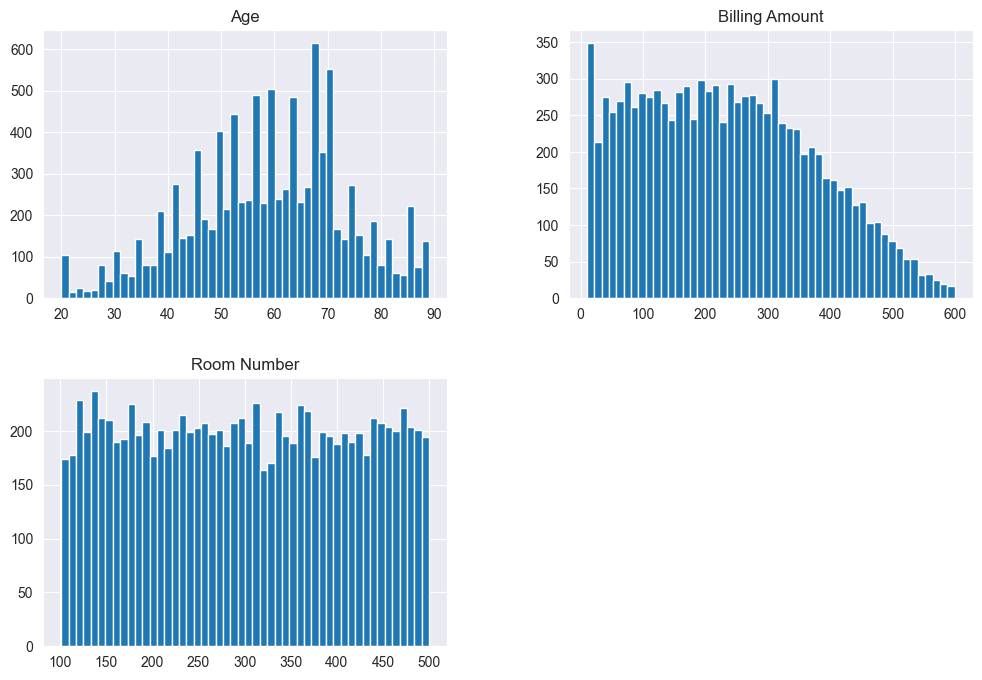

In [624]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
selected_columns = ['Age', 'Billing Amount', 'Room Number']

# Plot histograms for selected columns
df[selected_columns].hist(bins=50, figsize=(12, 8))
plt.show()


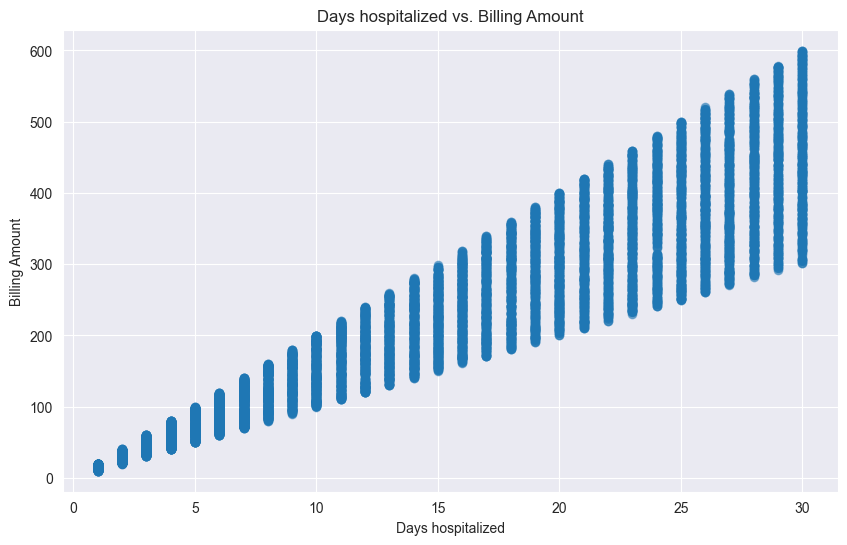

In [625]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Scatter plot for Days hospitalized vs. Billing Amount
plt.scatter(df['Days hospitalized'], df['Billing Amount'], alpha=0.5)
plt.title('Days hospitalized vs. Billing Amount')
plt.xlabel('Days hospitalized')
plt.ylabel('Billing Amount')
plt.show()

In [626]:
# categorical features

df.describe(include=['O'])

,Name,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Admission Type,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,9416,8639,5,3,5,3
top,Michael Johnson,Female,O+,Arthritis,Michael Johnson,Smith PLC,Cigna,Urgent,Penicillin,Abnormal
freq,7,5075,3694,4660,7,19,2040,3391,2079,3456


In [627]:
cols = ['Gender','Blood Type', 'Medical Condition',
        'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results','isDrinking','isSmoking','isImproperDiet']

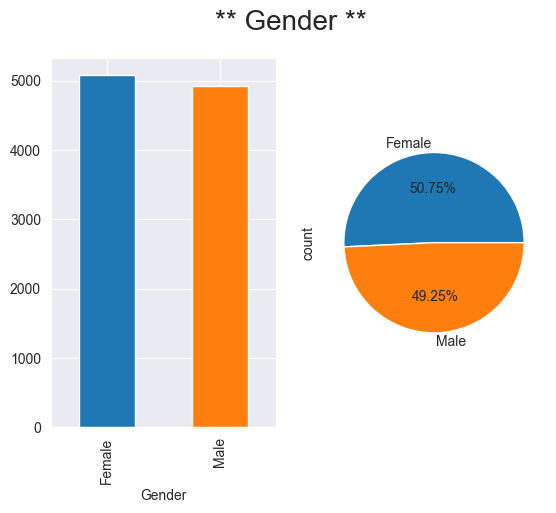

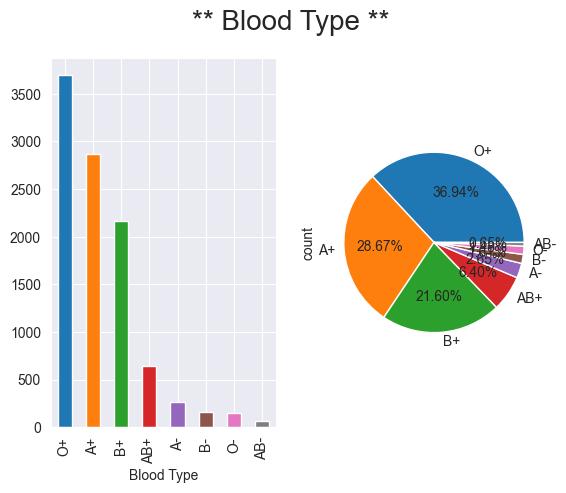

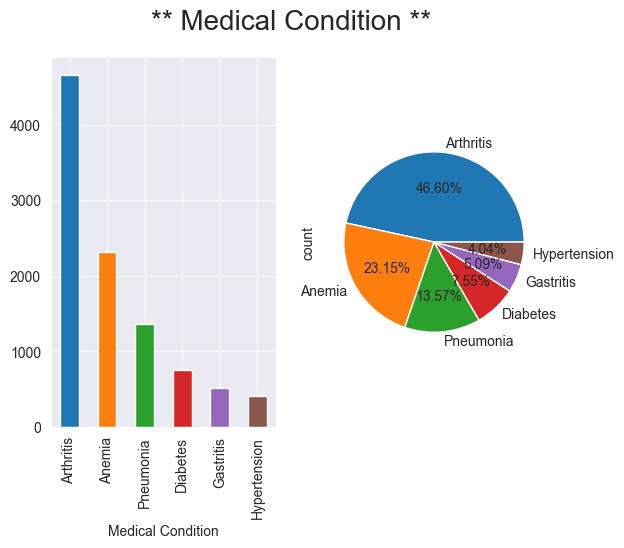

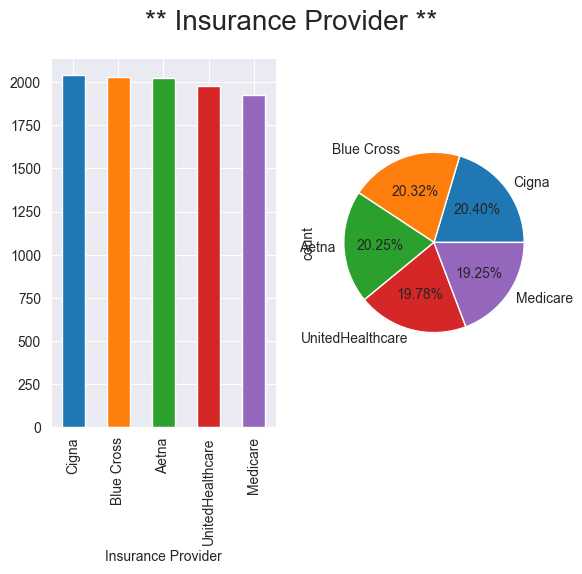

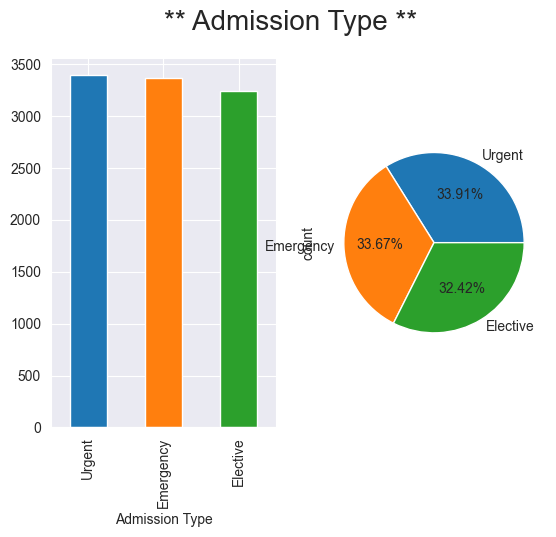

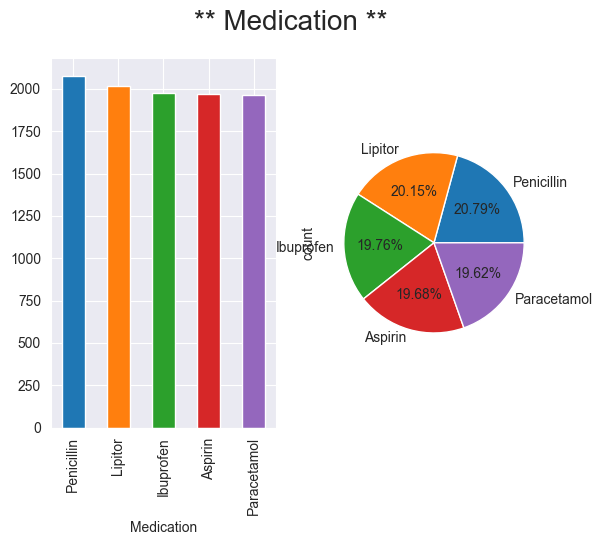

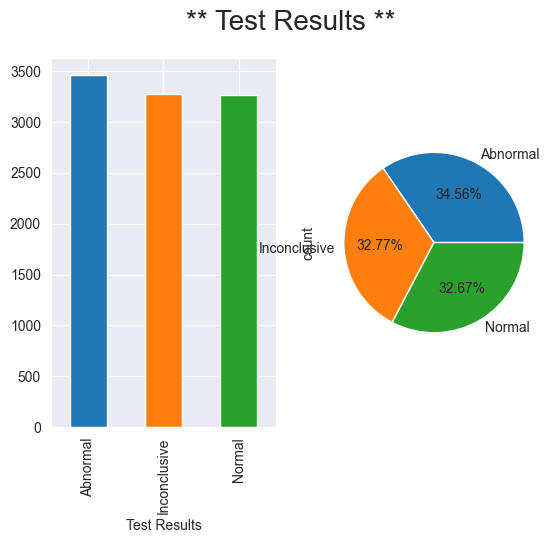

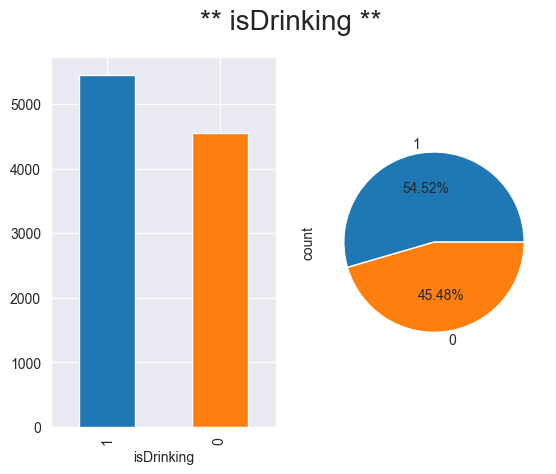

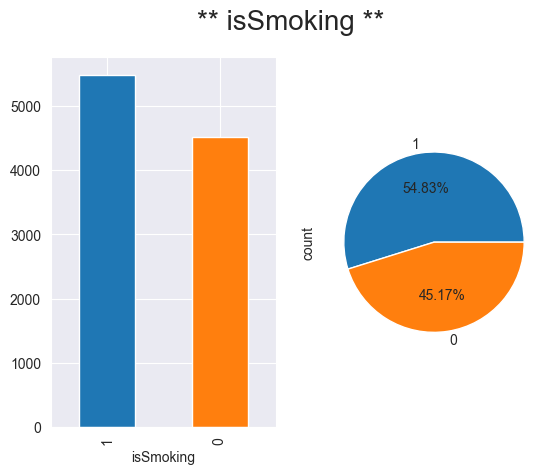

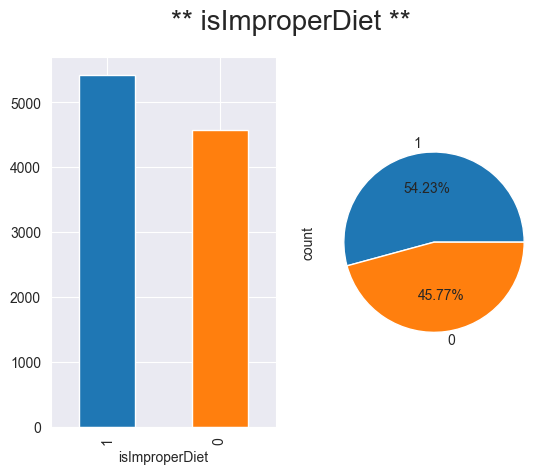

In [628]:
# Categorical Features
for i in cols:
    
    if i == 'Gender':

        fig, ax = plt.subplots(1, 2) 
        fig.suptitle('** Gender **', fontsize=20) 

        plt.subplot(1,2,1)
        df['Gender'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()
    
    else:
        fig, ax = plt.subplots(1, 2) 
        fig.suptitle('** ' + i + ' **', fontsize=20) 
        plt.subplot(1,2,1)
        df[i].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df[i].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()

In [629]:
cols = ['Gender','Blood Type', 'Medical Condition','Doctor',
        'Hospital', 'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

In [630]:
# Highest "Features" according to Billing Amount

for i in cols:
    
    if i == 'Gender':

        char_bar = df.groupby(['Gender'])[['Billing Amount']].sum().reset_index()
        char_bar = char_bar.sort_values(by=("Billing Amount"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top['Gender'], y=top["Billing Amount"]))

        fig.update_layout(title="Highest Gender According to " + 'Billing Amount',
                          xaxis_title='Gender',
                          yaxis_title= "Billing Amount",
                          plot_bgcolor='white', 
                          paper_bgcolor='white',  
                          font=dict(color='black'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

    else:
        char_bar = df.groupby([i])[['Billing Amount']].sum().reset_index()
        char_bar = char_bar.sort_values(by=("Billing Amount"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top[i], y=top['Billing Amount']))

        fig.update_layout(title="Highest " + i + " According to Billing Amount",
                          xaxis_title= i,
                          yaxis_title= "Billing Amount",
                          plot_bgcolor='white', 
                          paper_bgcolor='white',  
                          font=dict(color='black'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

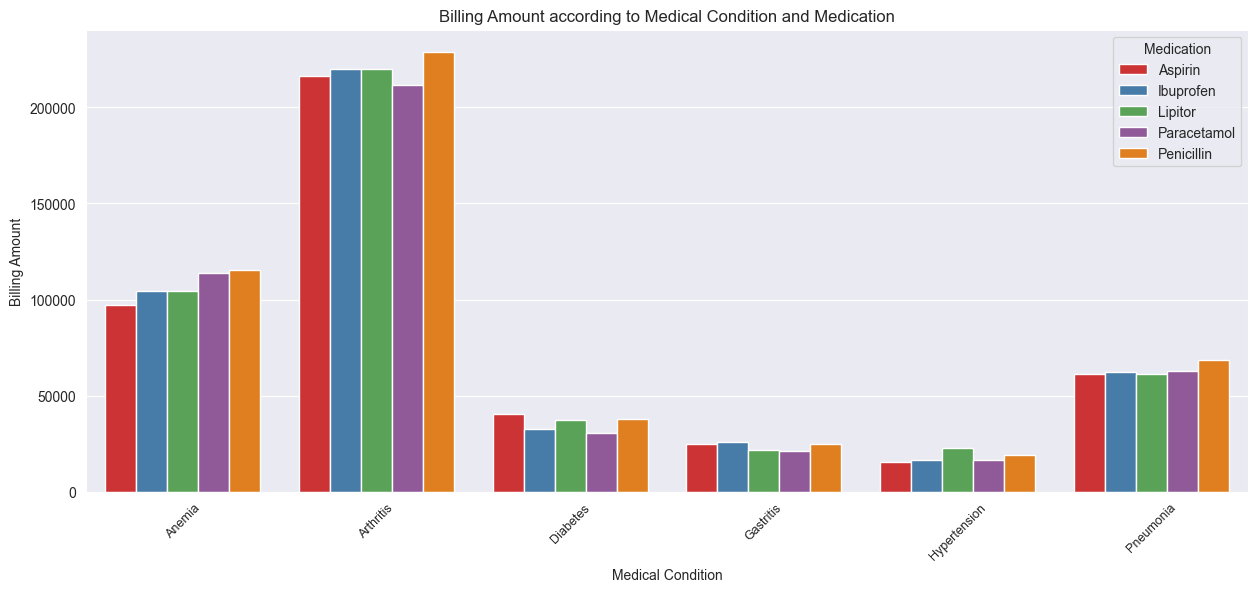

In [631]:
# Billing Amount according to Medical Condition and Medication
df_trans = df.groupby(['Medical Condition', 'Medication'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Medication'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Medication")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

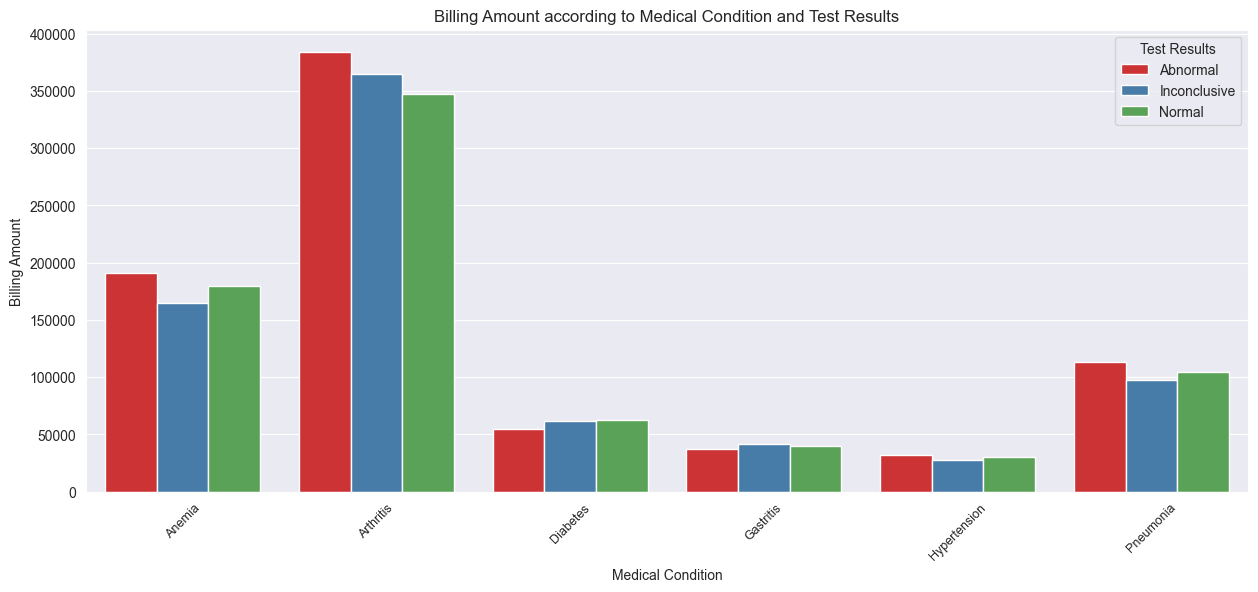

In [632]:
# Billing Amount according to Medical Condition and Test Results
df_trans = df.groupby(['Medical Condition', 'Test Results'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Test Results'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Test Results")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

<Axes: xlabel='Discharge Date', ylabel='Billing Amount'>

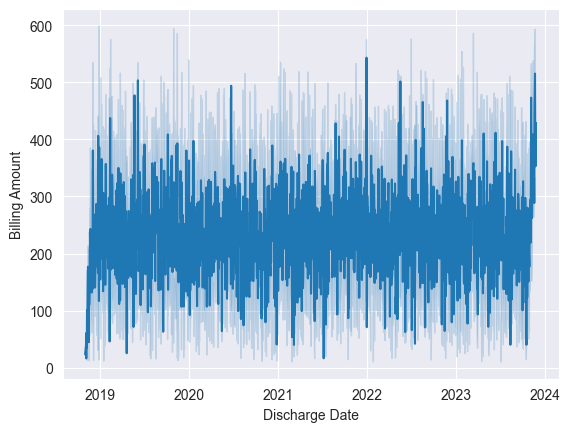

In [633]:
sns.lineplot(data=df, x="Discharge Date", y="Billing Amount")

<Axes: xlabel='Date of Admission', ylabel='Billing Amount'>

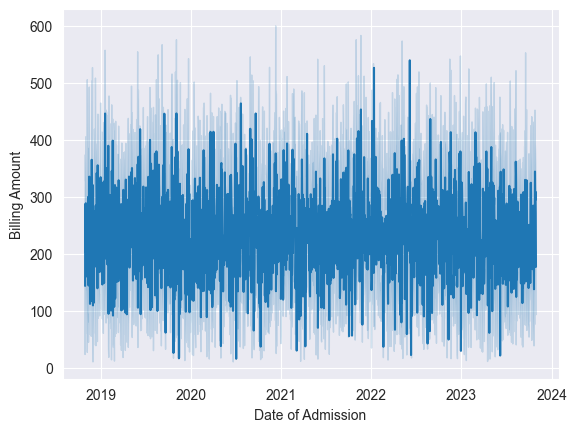

In [634]:
sns.lineplot(data=df, x="Date of Admission", y="Billing Amount")

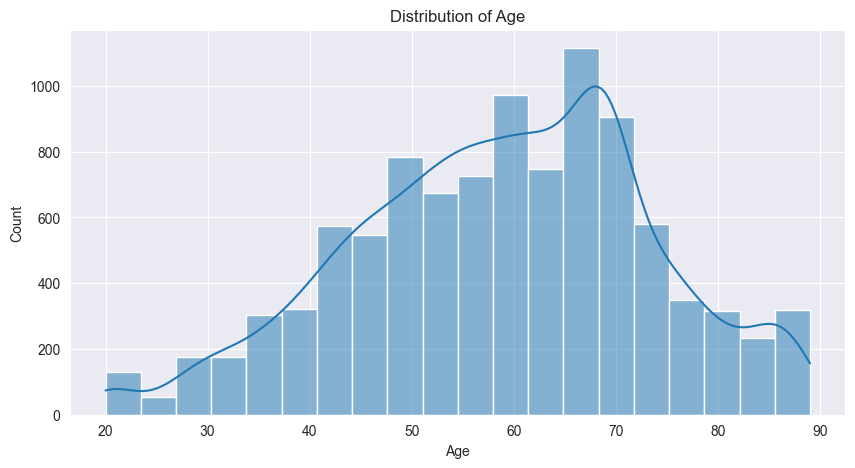

In [635]:
# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

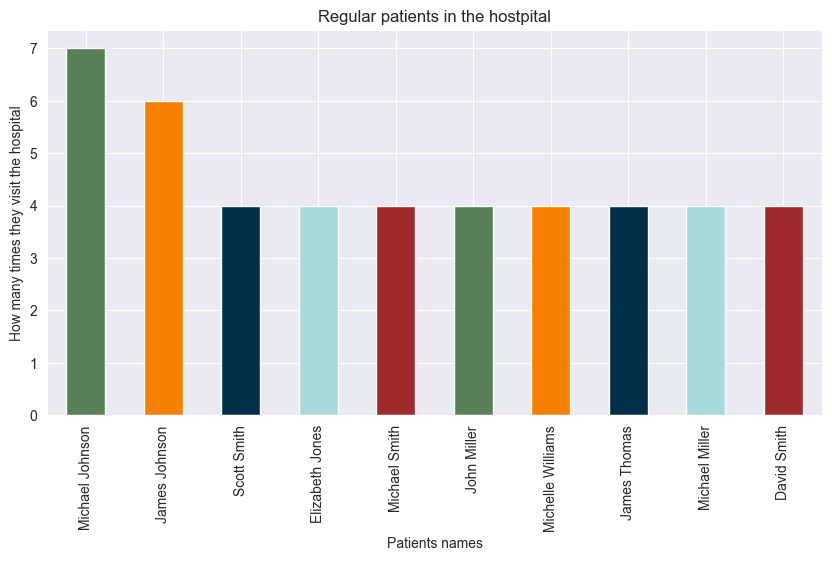

In [636]:
# Checking the regular customers
df['Name'].value_counts().sort_values(ascending=False).head(10)\
.plot(kind='bar',figsize=(10,5),title="Regular patients in the hostpital",color=['#588157','#f77f00','#003049','#a8dadc','#9e2a2b'])
plt.xlabel("Patients names")
plt.ylabel("How many times they visit the hospital")
plt.show()

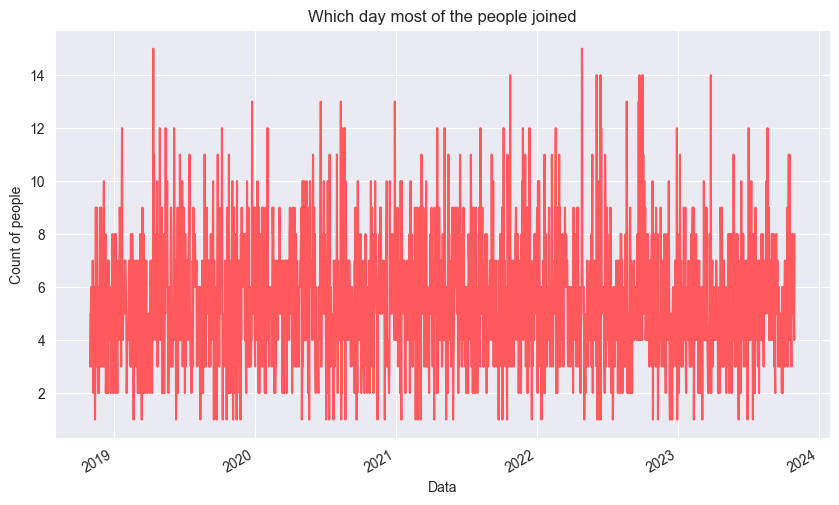

In [637]:
# Find the which date most of the people joined
df['Date of Admission'].value_counts().sort_values(ascending=False)\
.plot(kind='line',figsize=(10,6),title="Which day most of the people joined",color=['#ff595e'])
plt.xlabel("Data")
plt.ylabel("Count of people")
plt.show()

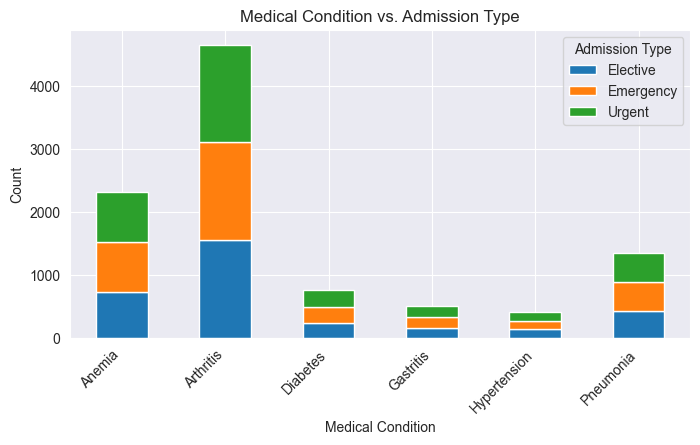

In [638]:
condition_admission_counts = df.groupby(['Medical Condition', 'Admission Type']).size().unstack(fill_value=0)

condition_admission_counts.plot(kind='bar', stacked=True, figsize=(8, 4))

plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.title('Medical Condition vs. Admission Type')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Admission Type')

plt.show()

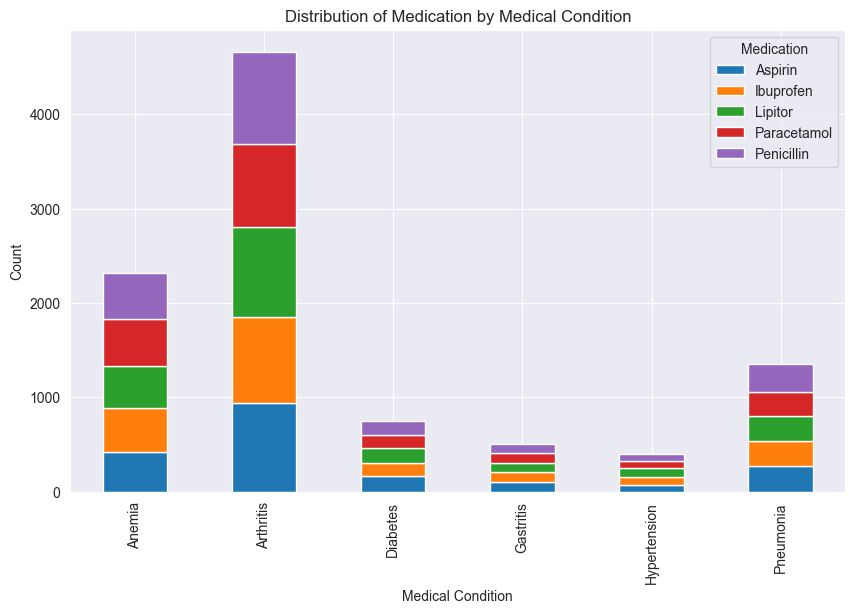

In [639]:
medication = df.groupby(['Medical Condition', 'Medication']).size().unstack()

medication.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.title('Distribution of Medication by Medical Condition')

plt.show()

<h1>Предсказание диагноза с помощью 4 моделей</h1>

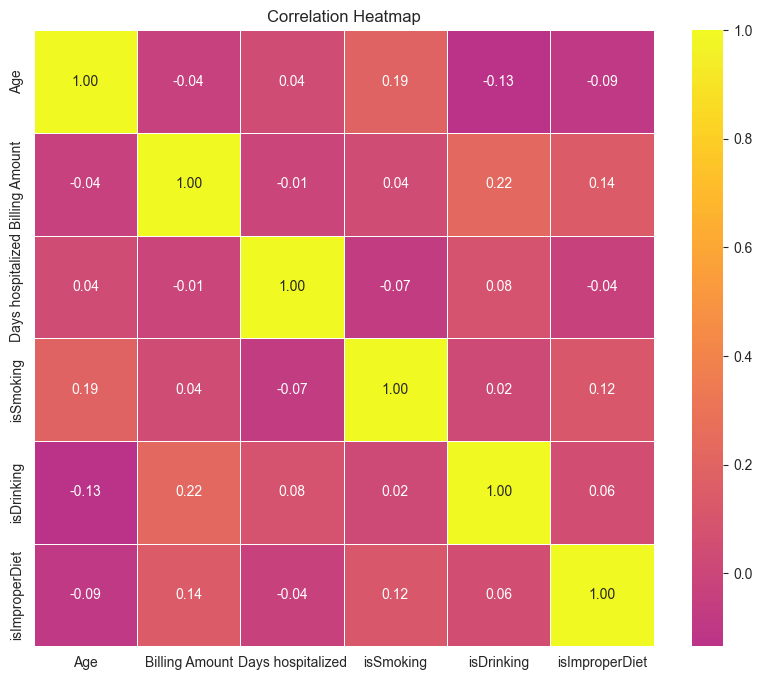

In [640]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Generate synthetic data for illustration
np.random.seed(42)
dfCorr = pd.DataFrame({
    'Age': np.random.randint(20, 80, size=100),
    'Billing Amount': np.random.uniform(1000, 10000, size=100),
    'Days hospitalized': np.random.randint(1, 21, size=100),
    'isSmoking': np.random.choice([0, 1], size=100),
    'isDrinking': np.random.choice([0, 1], size=100),
    'isImproperDiet': np.random.choice([0, 1], size=100),
})

# Calculate the correlation matrix
corr_matrix = dfCorr.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='plasma', center=0, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [644]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame and 'Medical Condition' is your target variable
X = df[['Age', 'Billing Amount', 'Days hospitalized', 'isSmoking', 'isDrinking', 'isImproperDiet']]
y = df['Medical Condition']

# Encode categorical variables if needed
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'RandomForest Accuracy: {rf_accuracy}')

RandomForest Accuracy: 0.7045


In [646]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'Medical Condition' is your target variable
le = LabelEncoder()
df['TargetEncoded'] = le.fit_transform(df['Medical Condition'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, df['TargetEncoded'], test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'XGBoost Accuracy: {xgb_accuracy}')


XGBoost Accuracy: 0.7205


In [647]:
# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy}')

Logistic Regression Accuracy: 0.733


In [648]:
# Train Support Vector Classifier (SVC) model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
print(f'SVC Accuracy: {svc_accuracy}')

SVC Accuracy: 0.467


Accuracy for Logistic Regression: 0.73
Accuracy for Random Forest: 0.71
Accuracy for Support Vector Machine: 0.47
Accuracy for XGBoost: 0.72


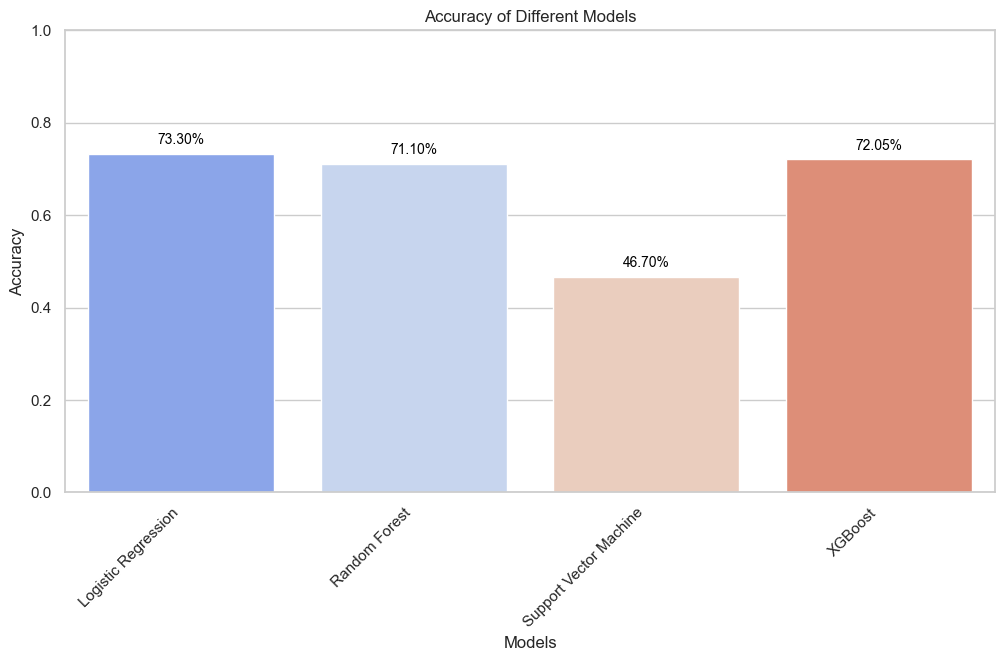

In [649]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier()
}

accuracies = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy for {model_name}: {accuracy:.2f}')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=list(models.keys()), y=accuracies, palette="coolwarm")
barplot.set(xlabel='Models', ylabel='Accuracy', title='Accuracy of Different Models')

for p, acc in zip(barplot.patches, accuracies):
    barplot.annotate(f'{acc:.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                     textcoords='offset points')

barplot.yaxis.grid(True)

plt.xticks(rotation=45, ha='right')

plt.ylim([0, 1])
plt.show()

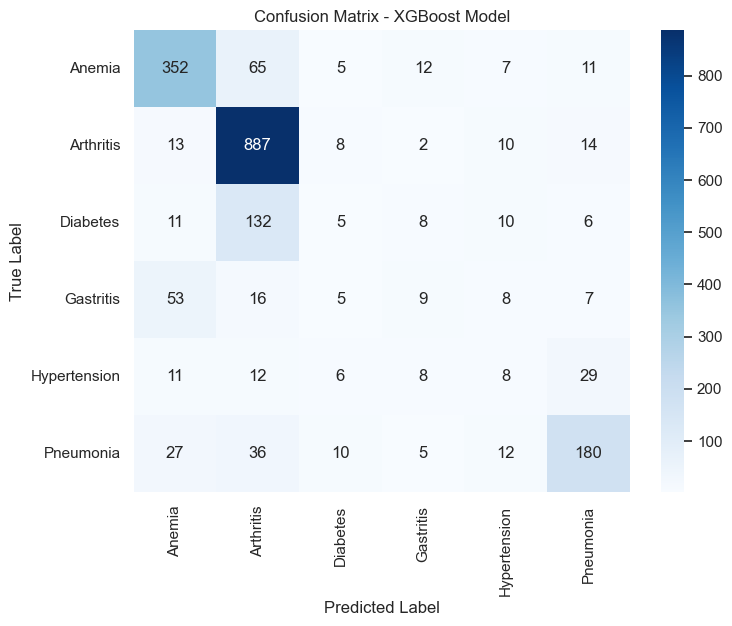

In [651]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Medical Condition' is your target variable
le = LabelEncoder()
df['TargetEncoded'] = le.fit_transform(df['Medical Condition'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, df['TargetEncoded'], test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_predictions)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - XGBoost Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [652]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Assuming df is your DataFrame and 'Medical Condition' is your target variable
le = LabelEncoder()
df['TargetEncoded'] = le.fit_transform(df['Medical Condition'])

# Features and target variable
X = X_encoded
y = df['TargetEncoded']

# XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Stratified K-Fold cross-validation (preserving the percentage of samples for each class)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
cv_scores = cross_val_score(xgb_model, X, y, cv=cv, scoring='accuracy')

# Display cross-validation accuracy scores
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.737  0.7335 0.7295 0.7205 0.7265]
Mean Accuracy: 0.7294


In [653]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Assuming df is your DataFrame and 'Medical Condition' is your target variable
le = LabelEncoder()
df['TargetEncoded'] = le.fit_transform(df['Medical Condition'])

# Features and target variable
X = X_encoded
y = df['TargetEncoded']

# XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Stratified K-Fold cross-validation (preserving the percentage of samples for each class)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
cv_scores = cross_val_score(xgb_model, X, y, cv=cv, scoring='accuracy')

# Display cross-validation accuracy scores
for fold, accuracy in enumerate(cv_scores, 1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

print("\nMean Accuracy:", np.mean(cv_scores))


Fold 1: Accuracy = 0.7370
Fold 2: Accuracy = 0.7335
Fold 3: Accuracy = 0.7295
Fold 4: Accuracy = 0.7205
Fold 5: Accuracy = 0.7265

Mean Accuracy: 0.7294


In [657]:
from sklearn.model_selection import GridSearchCV

# Assuming df is your DataFrame and 'Medical Condition' is your target variable
le = LabelEncoder()
df['TargetEncoded'] = le.fit_transform(df['Medical Condition'])

# Features and target variable
X = X_encoded
y = df['TargetEncoded']

# XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Display the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Display the best cross-validated accuracy
best_accuracy = grid_search.best_score_
print(f'Best Cross-Validated Accuracy: {best_accuracy}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best Cross-Validated Accuracy: 0.7399000000000001
